### 과제(토). 인공신경망_분류

유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

유방암 데이터의 경우, 이전 실습을 통해 데이터 유형 및 기초통계량을 확인하였다.  
따라서, 데이터를 호출한 후 목표변수·설명변수를 분류하고 인공신경망 모델을 구현하였다.  

파라미터 조정 없을 때의 모델 설명력은 train, test에 대해 90%, 93%이다.

In [3]:
df = pd.read_csv('유방암.csv', encoding='euc-kr')
df_y = df['diagnosis']
df_x = df.drop('diagnosis', axis=1)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.4, random_state = 1234)


nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print('Accuracy on training set : {}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.9010416666666666
Accuracy on test set : 0.9296875


C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


인공신경망의 경우 은닉층이라는 파라미터가 존재한다.  
은닉층 변경에 따른 모델 정확도를 확인하였다.  

C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


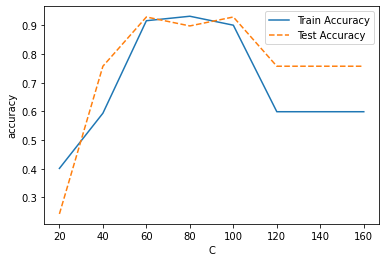

In [16]:
train_accuracy = []; test_accuracy = []
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)
plt.plot(para_hidden, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

인공신경망 모델은 이전 은닉층의 정보를 다음 층으로 출력하는 활성화 함수를 파라미터로 갖는다.  
logistic, tanh, relu 함수에 따른 모델 정확도를 확인하였다.

C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


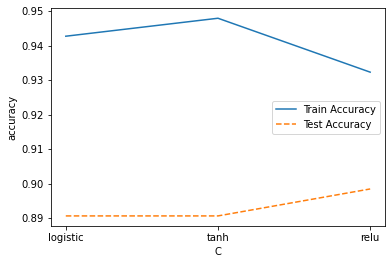

In [4]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes = 80, random_state = 1234, activation = v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['HiddenLayer'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

이후, 데이터 표준화를 통해 데이터 단위차를 최소화한 후 모델을 재구성하였다.  
표준화 이후 모델의 기본 설명력은 train, test에 대해 각각 99%, 95%를 나타냈다.

In [13]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)

nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
print(nn_scaled.score(df_scaled_train_x, df_train_y))
print(nn_scaled.score(df_scaled_test_x, df_test_y))

0.9947916666666666
0.953125


C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


앞과 마찬가지로, 은닉층 조정에 따른 모델 정확도 변화를 확인하였다.  
은닉층이 120일 때, train, test 정확도가 높아졌기 때문에 파라미터 값을 120으로 설정했다.

C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


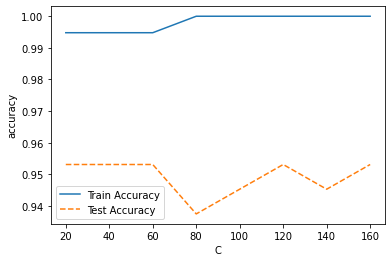

In [17]:
train_accuracy = []; test_accuracy = []
para_hidden = [20*hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)
plt.plot(para_hidden, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

활성화 함수의 경우, relu 함수가 가장 높은 정확도를 보여주었다. 

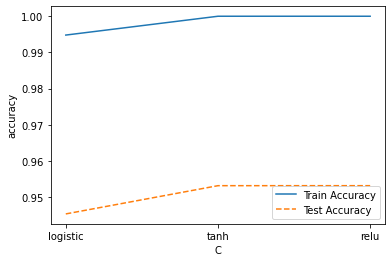

In [21]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function:
    nn = MLPClassifier(hidden_layer_sizes = (120,120), random_state = 1234, activation = v_function)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['HiddenLayer'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)
plt.plot(para_function, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

다음으로 가중치 최적화 종류에 따른 모델 정확도를 확인하였다.  
adam이 가장 높은 정확도를 기록하였다.

C:\Users\goeunseong\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


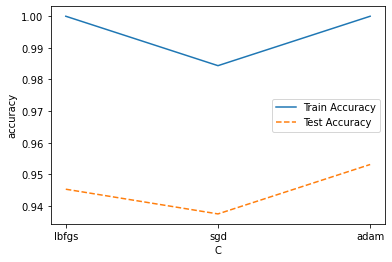

In [22]:
train_accuracy = []; test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, hidden_layer_sizes = (120,120), random_state = 1234, activation = 'relu')
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['HiddenLayer'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

df_accuracy_solver.round(3)
plt.plot(para_solver, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

다음으로 배치 크기에 따른 모델 정확도 변화이다.  
batch = 60일 때, test 데이터 정확도가 올라가므로 파라미터 값을 60으로 설정하였다.

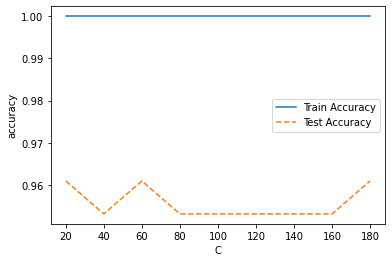

In [25]:
train_accuracy = []; test_accuracy = []
para_batch = [20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = 'adam', hidden_layer_sizes = (120,120), random_state = 1234, activation = 'relu')
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

plt.plot(para_batch, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

최종 모델 결과, 모델은 train, test에 대해 각각 100%, 96%의 정확도를 나타냈다.  
train data에 대한 설명력이 100%이기 때문에 과대적합 되었다고 할 수 있다. 

In [26]:
nn_final = MLPClassifier(batch_size = 60, solver = 'adam', hidden_layer_sizes = (120,120), random_state = 1234, activation = 'relu')
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 1.0
Accuracy on test set : 0.961
              precision    recall  f1-score   support

          양성      0.861     1.000     0.925        31
          음성      1.000     0.948     0.974        97

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



### 과제(토). KNN
유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.

데이터 호출 및 모델 성능 평가

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.9322916666666666
Accuracy on test set : 0.914


이웃 수 증가에 따른 정확도 변화 확인

In [37]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,31)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.898
1,2,0.922,0.875
2,3,0.932,0.898
3,4,0.932,0.906
4,5,0.932,0.914
5,6,0.927,0.930
6,7,0.927,0.898
7,8,0.906,0.883
8,9,0.911,0.906
9,10,0.906,0.938


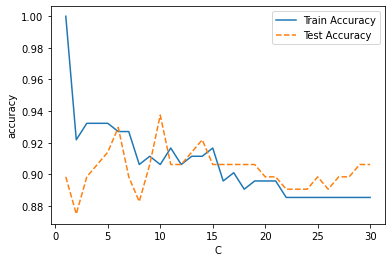

In [34]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

가중치별 이웃 수 증가에 따른 정확도 변화

In [49]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]*2

para_weights = (['uniform']) * 15 + (['distance'] * 15)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.922,0.875
2,3,uniform,0.932,0.898
3,4,uniform,0.932,0.906
4,5,uniform,0.932,0.914
5,6,uniform,0.927,0.930
6,7,uniform,0.927,0.898
7,8,uniform,0.906,0.883
8,9,uniform,0.911,0.906
9,10,uniform,0.906,0.938


In [50]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights', values = ['TrainAccuracy', 'TestAccuracy'])

level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.921875,0.898438,0.875000
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.932292,0.898438,0.906250
5,1.0,0.932292,0.914062,0.914062


가중치별 이웃 수 증가에 따른 정확도 시각화  
가중치가 distance일 때, train 데이터의 모델 정확도가 과대적합임을 알 수 있다.

<AxesSubplot:xlabel='Neighbors'>

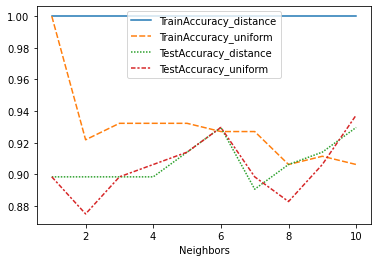

In [46]:
sns.lineplot(data = df_accuracy_weights_pivot)

거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [57]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]*3

para_metric = (['minkowski']) * 15 + (['euclidean'] * 15 + ['manhattan'] * 15)

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = 'uniform', metric = v_metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy

df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.898
1,2,minkowski,0.922,0.875
2,3,minkowski,0.932,0.898
3,4,minkowski,0.932,0.906
4,5,minkowski,0.932,0.914
5,6,minkowski,0.927,0.930
6,7,minkowski,0.927,0.898
7,8,minkowski,0.906,0.883
8,9,minkowski,0.911,0.906
9,10,minkowski,0.906,0.938


거리 계산 방법별 이웃 수 증가에 따른 정확도 시각화  
거리 계산 방법에 따른 정확도의 뚜렷한 차이가 나지 않음

<AxesSubplot:xlabel='Neighbors'>

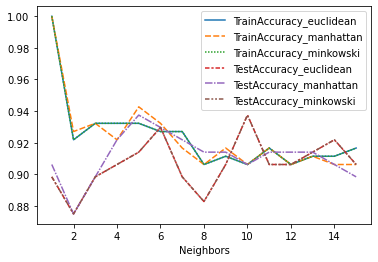

In [61]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors', columns = 'Metric', values = ['TrainAccuracy', 'TestAccuracy'])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

최종 KNN 모델의 정확도는 train, test data에 대해 각각 90%, 94%로  
test data에 대해 더 높은 정확도를 보이고 있다. 

In [64]:
knn_model = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('Accuracy on training set : {}'.format(knn_model.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_model.score(df_test_x, df_test_y)))

print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set : 0.90625
Accuracy on test set : 0.938
              precision    recall  f1-score   support

          양성      0.829     0.935     0.879        31
          음성      0.978     0.938     0.958        97

    accuracy                          0.938       128
   macro avg      0.904     0.937     0.918       128
weighted avg      0.942     0.938     0.939       128

